In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats
import scipy.optimize as opt
# ファイルを読み込む
pd_reader = pd.read_csv("金融工学_第11回_スマートベータデータ.csv", encoding="ANSI")
df = pd_reader
display(df)

,yyyymm,等ウェイト,高配当,最小分散,クオリティ,企業価値,市場指数
0,200001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,200002,-4.326403,-7.506763,-2.580708,5.451383,-3.507194,-0.025701
2,200003,6.431353,5.873751,3.001612,-2.968766,5.069897,1.072972
3,200004,-0.590110,3.522099,0.107569,-1.200467,-0.816037,-2.541618
4,200005,1.626499,2.168112,-3.809710,-10.021505,-2.298337,-5.430798
...,...,...,...,...,...,...,...
247,202008,9.403594,10.961215,6.892987,3.240581,10.404669,7.936409
248,202009,0.771339,-1.601116,-0.309241,3.860360,-1.731106,0.618640
249,202010,-3.804058,-0.241031,-3.954824,-1.749322,-2.690068,-2.519181
250,202011,11.116687,8.799679,8.668490,13.346730,10.694101,12.212388


In [10]:
from scipy.optimize import minimize
#ポートフォリオ最適化関数
def optimize_portfolio(expected_returns, cov_matrix, risk_tolerance):
    num_assets = len(expected_returns)
    
    def objective(weights):
        return weights.dot(cov_matrix).dot(weights) - risk_tolerance * expected_returns.dot(weights)

    def constraint(weights):
        return weights.sum() - 1

    bounds = tuple((0, 1) for _ in range(num_assets))
    constraints = ({'type': 'eq', 'fun': constraint})
    initial_weights = np.ones(num_assets) / num_assets

    result = minimize(objective, initial_weights, bounds=bounds, constraints=constraints)
    return result.x

def nextym(yyyymm):
    yyyymm = yyyymm + 1
    if yyyymm % 100 == 13:
        yyyymm = yyyymm + 88
    return yyyymm

In [11]:
def backtest(risk_tolerance):    
    np.set_printoptions(precision=3)
    yyyymm_start = 201501
    yyyymm_end = 201801 #バックテスト期間は201501から201801まで

    n = 0
    acc_rtn = 0
    ACC_RTN = []
    

    while yyyymm_end <= 202011:

        print(yyyymm_end)
        #Ｔ時点の前36月分の歴史データを抽出する
        tmp = df[(df.yyyymm >= yyyymm_start) & (df.yyyymm < yyyymm_end)] 
        tmp = tmp.drop('yyyymm',axis=1)
        Mean = tmp.mean().values
        #print(Mean)
        tmp = tmp.values.T
        Cov = np.cov(tmp)
        #print(Cov)

        optimized_weights = optimize_portfolio(Mean, Cov, risk_tolerance)

        yyyymm_start = nextym(yyyymm_start)
        yyyymm_end = nextym(yyyymm_end)
        n = n + 1
        next_rtn = df[df.yyyymm == yyyymm_end]
        next_rtn = next_rtn.drop('yyyymm',axis=1).values
        rtn = next_rtn.dot(optimized_weights)
        print('allocation:',optimized_weights)
        print('potforlio return:',rtn,'\n')
        acc_rtn = acc_rtn + rtn + 0
        ACC_RTN.append(acc_rtn)
    return ACC_RTN
high_risk = backtest(100)
mid_risk = backtest(0)
low_risk = backtest(-100)


201801
allocation: [6.968e-13 1.000e+00 3.271e-13 0.000e+00 0.000e+00 0.000e+00]
potforlio return: [-4.383] 

201802
allocation: [3.939e-14 1.000e+00 7.050e-15 3.811e-14 4.358e-15 9.687e-15]
potforlio return: [-1.729] 

201803
allocation: [2.394e-13 1.000e+00 9.368e-14 0.000e+00 0.000e+00 0.000e+00]
potforlio return: [3.712] 

201804
allocation: [0.000e+00 1.000e+00 0.000e+00 1.549e-13 9.898e-13 8.086e-13]
potforlio return: [-3.914] 

201805
allocation: [1.689e-13 1.000e+00 1.689e-13 3.292e-14 0.000e+00 0.000e+00]
potforlio return: [-1.483] 

201806
allocation: [0.000e+00 0.000e+00 1.000e+00 0.000e+00 1.266e-13 9.104e-14]
potforlio return: [0.545] 

201807
allocation: [0.000e+00 0.000e+00 1.000e+00 0.000e+00 2.363e-12 1.331e-12]
potforlio return: [-2.038] 

201808
allocation: [6.443e-01 0.000e+00 1.114e-02 3.446e-01 8.640e-14 6.508e-14]
potforlio return: [4.955] 

201809
allocation: [3.794e-13 0.000e+00 7.269e-14 1.000e+00 0.000e+00 0.000e+00]
potforlio return: [-11.673] 

201810
alloc

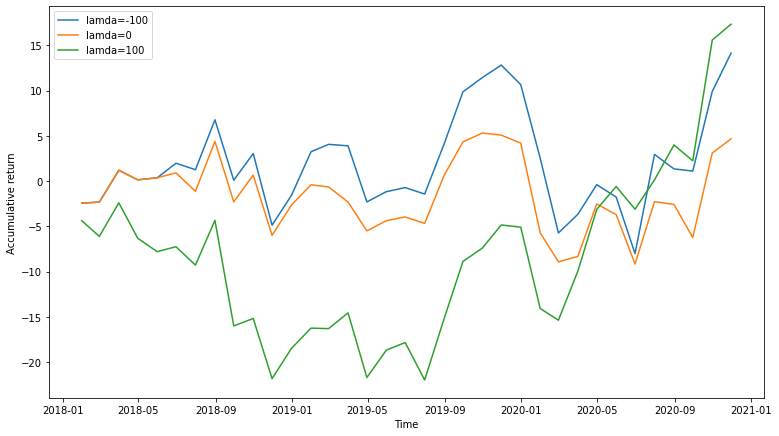

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12.8, 7.2)

x=pd.date_range('2018-01-01','2020-12-01',freq='M')
y1 = low_risk
plt.plot(x,y1)
y2 = mid_risk
plt.plot(x,y2)
y3 = high_risk
plt.plot(x,y3)
plt.xlabel("Time")
plt.ylabel("Accumulative return")
plt.legend(["lamda=-100","lamda=0","lamda=100"],shadow=False,fancybox="blue")
plt.show()